In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [2]:
df_c=pd.read_csv('FINAL CALL DATA.csv')
df_c

,[UNDERLYING_LAST],[DTE],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_IV],[C_LAST],[STRIKE],Call_BS
0,172.17,0.008219,0.94168,0.00094,0.01792,-0.03468,0.00227,0.84394,23.00,147.0,25.282476
1,172.17,0.008219,0.94263,0.00186,0.01850,-0.06046,0.00321,0.74618,21.75,150.0,22.279862
2,172.17,0.008219,0.94503,0.00174,0.01738,-0.03516,0.00189,0.64277,17.55,152.5,19.761204
3,172.17,0.008219,0.94318,0.00412,0.01893,-0.08519,0.00381,0.58444,17.17,155.0,17.274256
4,172.17,0.008219,0.94856,0.00337,0.01729,-0.03541,0.00301,0.47237,13.60,157.5,14.746163
...,...,...,...,...,...,...,...,...,...,...,...
277006,293.20,2.060274,0.18480,0.00260,1.12195,-0.01733,0.91873,0.24551,10.95,420.0,12.220778
277007,293.20,2.060274,0.15494,0.00231,0.99964,-0.01550,0.77516,0.24797,6.00,440.0,10.053164
277008,293.20,2.060274,0.08492,0.00159,0.65873,-0.00965,0.44507,0.23212,3.49,480.0,5.019698
277009,293.20,2.060274,0.07622,0.00146,0.60341,-0.00848,0.39812,0.23210,2.85,490.0,4.428689


In [3]:
n = len(df_c)
n_train =  (int)(0.7 * n)
print(n_train)

193907


In [4]:
train = df_c[0:n_train]
X_train = train[[' [UNDERLYING_LAST]', ' [DTE]', ' [STRIKE]', ' [C_IV]']].values
y_train = train[' [C_LAST]'].values

In [5]:
test = df_c[n_train+1:n]
X_test = test[[' [UNDERLYING_LAST]', ' [DTE]', ' [STRIKE]', ' [C_IV]']].values
y_test = test[' [C_LAST]'].values

In [6]:
from keras.layers import Activation, LeakyReLU, BatchNormalization
from keras.callbacks import EarlyStopping, TensorBoard


In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [8]:
# X_train_scaled=scaler.fit_transform(X_train)
# X_train_scaled.shape

In [9]:
# y_train=y_train.reshape(-1,1)
# y_train_scaled=scaler.fit_transform(y_train)

In [10]:
# y_train_scaled.shape

In [11]:
# X_train_scaled = X_train_scaled.reshape(n_train, 1, 4)
# y_train_scaled = y_train_scaled.reshape(n_train, 1, 1)
X_train = X_train.reshape(n_train, 1, 4)
y_train = y_train.reshape(n_train, 1, 1)

In [12]:
n_test = len(test)
n_test

83103

In [13]:
# X_test_scaled=scaler.fit_transform(X_test)
# y_test=y_test.reshape(-1,1)
# y_test_scaled=scaler.fit_transform(y_test)
# X_test_scaled = X_test_scaled.reshape(n_test, 1, 4)
# y_test_scaled = y_test_scaled.reshape(n_test, 1, 1)
X_test = X_test.reshape(n_test, 1, 4)
y_test = y_test.reshape(n_test, 1, 1)

In [14]:
model = Sequential()

model.add(LSTM(100, input_shape=(1, 4), return_sequences=True))
model.add(BatchNormalization())

model.add(LSTM(50, return_sequences=True))
model.add(BatchNormalization())

model.add(LSTM(20, return_sequences=False))
model.add(BatchNormalization())

model.add(Dense(1))
model.add(LeakyReLU())

model.compile(loss='mean_absolute_error', metrics=['mean_absolute_error', 'mean_squared_error'], optimizer='RMSprop')
          

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 100)            42000     
_________________________________________________________________
batch_normalization (BatchNo (None, 1, 100)            400       
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 50)             30200     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 50)             200       
_________________________________________________________________
lstm_2 (LSTM)                (None, 20)                5680      
_________________________________________________________________
batch_normalization_2 (Batch (None, 20)                80        
_________________________________________________________________
dense (Dense)                (None, 1)                 2

In [16]:
callback_es = EarlyStopping(monitor='val_loss', patience=5, verbose=2, restore_best_weights=True)

In [17]:
history=model.fit(X_train, y_train, batch_size=128, epochs=100, verbose=2, 
          callbacks=[callback_es], validation_data=(X_test, y_test))


Epoch 1/100
1515/1515 - 38s - loss: 9.1512 - mean_absolute_error: 9.1512 - mean_squared_error: 389.4497 - val_loss: 3.6119 - val_mean_absolute_error: 3.6119 - val_mean_squared_error: 31.9251
Epoch 2/100
1515/1515 - 26s - loss: 3.2981 - mean_absolute_error: 3.2981 - mean_squared_error: 36.4578 - val_loss: 3.2484 - val_mean_absolute_error: 3.2484 - val_mean_squared_error: 29.9246
Epoch 3/100
1515/1515 - 25s - loss: 3.2256 - mean_absolute_error: 3.2256 - mean_squared_error: 35.0745 - val_loss: 3.4432 - val_mean_absolute_error: 3.4432 - val_mean_squared_error: 30.0670
Epoch 4/100
1515/1515 - 25s - loss: 3.0957 - mean_absolute_error: 3.0957 - mean_squared_error: 32.4156 - val_loss: 6.9511 - val_mean_absolute_error: 6.9511 - val_mean_squared_error: 77.0521
Epoch 5/100
1515/1515 - 25s - loss: 3.1079 - mean_absolute_error: 3.1079 - mean_squared_error: 31.9369 - val_loss: 4.7521 - val_mean_absolute_error: 4.7521 - val_mean_squared_error: 45.6626
Epoch 6/100
1515/1515 - 25s - loss: 3.0300 - mean

In [18]:
# history=model.fit(X_train_scaled, y_train_scaled, batch_size=128, epochs=200, verbose=2, 
#           callbacks=[callback_es], validation_data=(X_test_scaled, y_test_scaled))


In [19]:
y_train_pred = model.predict(X_train)

In [20]:
# y_train_pred = scaler.inverse_transform(y_train_pred_scaled)
y_train_pred

array([[26.290071],
       [23.608866],
       [21.339857],
       ...,
       [25.19378 ],
       [23.120472],
       [21.343704]], dtype=float32)

In [21]:
train['Call_LSTM']=y_train_pred
train

<ipython-input-21-c628b8c71e1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Call_LSTM']=y_train_pred


,[UNDERLYING_LAST],[DTE],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_IV],[C_LAST],[STRIKE],Call_BS,Call_LSTM
0,172.17,0.008219,0.94168,0.00094,0.01792,-0.03468,0.00227,0.84394,23.00,147.0,25.282476,26.290071
1,172.17,0.008219,0.94263,0.00186,0.01850,-0.06046,0.00321,0.74618,21.75,150.0,22.279862,23.608866
2,172.17,0.008219,0.94503,0.00174,0.01738,-0.03516,0.00189,0.64277,17.55,152.5,19.761204,21.339857
3,172.17,0.008219,0.94318,0.00412,0.01893,-0.08519,0.00381,0.58444,17.17,155.0,17.274256,19.167727
4,172.17,0.008219,0.94856,0.00337,0.01729,-0.03541,0.00301,0.47237,13.60,157.5,14.746163,16.649357
...,...,...,...,...,...,...,...,...,...,...,...,...
193902,179.02,1.649425,0.65827,0.00573,0.84465,-0.02014,1.41244,0.28033,32.60,165.0,35.369786,30.777674
193903,179.02,1.649425,0.62671,0.00588,0.87102,-0.02038,1.36556,0.27820,30.90,170.0,32.577601,27.764124
193904,179.02,1.649425,0.59577,0.00612,0.89144,-0.02070,1.31353,0.27681,27.13,175.0,29.994880,25.193781
193905,179.02,1.649425,0.56406,0.00628,0.90553,-0.02039,1.25991,0.27454,24.73,180.0,27.482092,23.120472


In [22]:
y_true=train[' [C_LAST]']
y_pred=train['Call_LSTM']
print('MAE = ', mean_absolute_error(y_true, y_pred))
print('MSE = ', mean_squared_error(y_true, y_pred))
print('RMSE = ', mean_squared_error(y_true, y_pred, squared=False))

MAE =  2.1763774655829464
MSE =  19.546502068311803
RMSE =  4.42114262021842


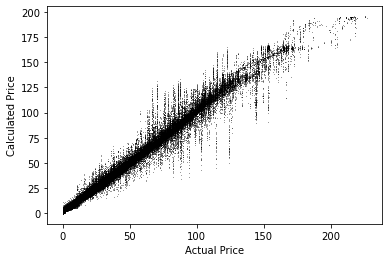

In [23]:
plt.scatter(y_true, y_pred,color='black',linewidth=0.2,alpha=0.5, s=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Calculated Price') 
plt.show()

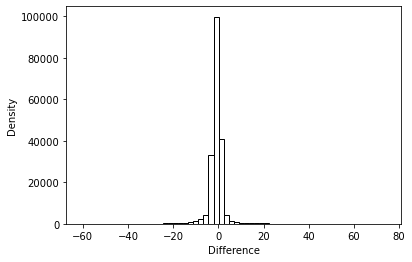

In [24]:
stats = dict()
stats['diff'] = y_true - y_pred
plt.hist(stats['diff'], bins=60,edgecolor='black',color='white')
plt.xlabel('Difference')
plt.ylabel('Density')
plt.show()

In [25]:
y_test_pred=model.predict(X_test)

In [26]:
# y_test_pred=scaler.inverse_transform(y_test_pred_scaled)

In [27]:
test['Call_LSTM']=y_test_pred
test

<ipython-input-27-fc64c810b219>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Call_LSTM']=y_test_pred


,[UNDERLYING_LAST],[DTE],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_IV],[C_LAST],[STRIKE],Call_BS,Call_LSTM
193908,179.02,1.649425,0.47056,0.00645,0.91520,-0.02033,1.08559,0.26887,18.55,195.0,20.895615,18.249273
193909,179.02,1.649425,0.44009,0.00641,0.90725,-0.02019,1.02520,0.26711,16.70,200.0,18.986668,16.793545
193910,179.02,1.649425,0.41070,0.00633,0.89419,-0.01936,0.96454,0.26497,14.95,205.0,17.174165,15.378510
193911,179.02,1.649425,0.38230,0.00629,0.87701,-0.01918,0.90546,0.26478,13.60,210.0,15.664548,14.070707
193912,179.02,1.649425,0.35522,0.00610,0.85580,-0.01888,0.84713,0.26322,12.55,215.0,14.150901,12.812605
...,...,...,...,...,...,...,...,...,...,...,...,...
277006,293.20,2.060274,0.18480,0.00260,1.12195,-0.01733,0.91873,0.24551,10.95,420.0,12.220778,7.946478
277007,293.20,2.060274,0.15494,0.00231,0.99964,-0.01550,0.77516,0.24797,6.00,440.0,10.053164,6.526969
277008,293.20,2.060274,0.08492,0.00159,0.65873,-0.00965,0.44507,0.23212,3.49,480.0,5.019698,4.818524
277009,293.20,2.060274,0.07622,0.00146,0.60341,-0.00848,0.39812,0.23210,2.85,490.0,4.428689,3.829427


In [28]:
y_true=test[' [C_LAST]']
y_pred=test['Call_LSTM']
print('MAE = ', mean_absolute_error(y_true, y_pred))
print('MSE = ', mean_squared_error(y_true, y_pred))
print('RMSE = ', mean_squared_error(y_true, y_pred, squared=False))

MAE =  2.7499456382835965
MSE =  20.488119979456037
RMSE =  4.526380450145131


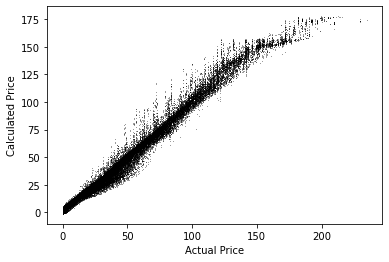

In [29]:
plt.scatter(y_true, y_pred,color='black',linewidth=0.2,alpha=0.5, s=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Calculated Price') 
plt.show()

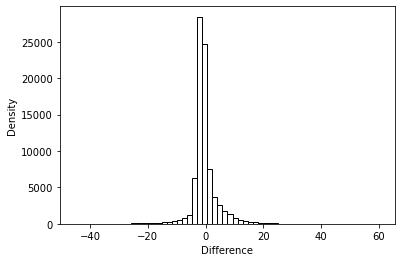

In [30]:
stats = dict()
stats['diff'] = y_true - y_pred
plt.hist(stats['diff'], bins=60,edgecolor='black',color='white')
plt.xlabel('Difference')
plt.ylabel('Density')
plt.show()

In [31]:
# train.to_csv('LSTM CALL train FINAL Results.csv', mode='a', index=False, header=True)

In [32]:
# test.to_csv('LSTM CALL test FINAL Results.csv', mode='a', index=False, header=True)

In [33]:
# model.save('LSTM_Call.h5')

In [34]:
df_p=pd.read_csv('FINAL PUT DATA.csv')
df_p

,[UNDERLYING_LAST],[DTE],[STRIKE],[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],Put_BS
0,172.17,0.008219,135.0,0.02,-0.00103,0.00027,0.00070,-0.00390,0.00000,0.77790,0.000762
1,172.17,0.008219,140.0,0.01,-0.00095,0.00038,0.00059,-0.00447,0.00000,0.67034,0.000797
2,172.17,0.008219,144.0,0.01,-0.00151,0.00046,0.00119,-0.00462,-0.00043,0.58576,0.000820
3,172.17,0.008219,145.0,0.01,-0.00214,0.00056,0.00065,-0.00460,0.00000,0.56515,0.000833
4,172.17,0.008219,146.0,0.01,-0.00191,0.00055,0.00094,-0.00450,0.00000,0.54460,0.000845
...,...,...,...,...,...,...,...,...,...,...,...
241798,293.20,2.060274,350.0,80.38,-0.69845,0.00415,1.41879,-0.02242,-5.75046,0.19411,59.202701
241799,293.20,2.060274,360.0,82.05,-0.74304,0.00396,1.30360,-0.02135,-6.15503,0.18650,65.179230
241800,293.20,2.060274,370.0,111.23,-0.78759,0.00361,1.15885,-0.01832,-6.57983,0.17749,71.388575
241801,293.20,2.060274,380.0,97.00,-0.83230,0.00330,0.98488,-0.01639,-7.00828,0.16808,78.021552


In [35]:
n = len(df_p)
n_train =  (int)(0.7 * n)
print(n_train)

169262


In [36]:
train = df_p[0:n_train]
X_train = train[[' [UNDERLYING_LAST]', ' [DTE]', ' [STRIKE]', ' [P_IV]']].values
y_train = train[' [P_LAST]'].values

In [37]:
test = df_p[n_train+1:n]
X_test = test[[' [UNDERLYING_LAST]', ' [DTE]', ' [STRIKE]', ' [P_IV]']].values
y_test = test[' [P_LAST]'].values

In [38]:
X_train = X_train.reshape(n_train, 1, 4)
y_train = y_train.reshape(n_train, 1, 1)
n_test = len(test)
X_test = X_test.reshape(n_test, 1, 4)
y_test = y_test.reshape(n_test, 1, 1)

In [39]:
model2 = Sequential()

model2.add(LSTM(150, input_shape=(1, 4), return_sequences=True))
model2.add(BatchNormalization())

model2.add(LSTM(100, return_sequences=False))
model2.add(BatchNormalization())

model2.add(Dense(1))
model2.add(LeakyReLU())

model2.compile(loss='mean_absolute_error', metrics=['mean_absolute_error', 'mean_squared_error'], optimizer='RMSprop')
          

In [40]:
history=model2.fit(X_train, y_train, batch_size=128, epochs=100, verbose=2, 
          callbacks=[callback_es], validation_data=(X_test, y_test))


Epoch 1/100
1323/1323 - 18s - loss: 4.2659 - mean_absolute_error: 4.2659 - mean_squared_error: 96.3815 - val_loss: 3.6542 - val_mean_absolute_error: 3.6542 - val_mean_squared_error: 32.4611
Epoch 2/100
1323/1323 - 15s - loss: 2.9100 - mean_absolute_error: 2.9100 - mean_squared_error: 48.7566 - val_loss: 6.1356 - val_mean_absolute_error: 6.1356 - val_mean_squared_error: 55.7475
Epoch 3/100
1323/1323 - 16s - loss: 2.8454 - mean_absolute_error: 2.8454 - mean_squared_error: 48.0051 - val_loss: 2.5382 - val_mean_absolute_error: 2.5382 - val_mean_squared_error: 27.4137
Epoch 4/100
1323/1323 - 15s - loss: 2.7935 - mean_absolute_error: 2.7935 - mean_squared_error: 46.2024 - val_loss: 2.6166 - val_mean_absolute_error: 2.6166 - val_mean_squared_error: 17.7567
Epoch 5/100
1323/1323 - 16s - loss: 2.7748 - mean_absolute_error: 2.7748 - mean_squared_error: 47.2511 - val_loss: 5.3519 - val_mean_absolute_error: 5.3519 - val_mean_squared_error: 51.0801
Epoch 6/100
1323/1323 - 17s - loss: 2.7473 - mean_

In [41]:
y_train_pred = model2.predict(X_train)
train['Put_LSTM']=y_train_pred
train

<ipython-input-41-43db45e0bb58>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Put_LSTM']=y_train_pred


,[UNDERLYING_LAST],[DTE],[STRIKE],[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],Put_BS,Put_LSTM
0,172.17,0.008219,135.0,0.02,-0.00103,0.00027,0.00070,-0.00390,0.00000,0.77790,0.000762,-1.214255
1,172.17,0.008219,140.0,0.01,-0.00095,0.00038,0.00059,-0.00447,0.00000,0.67034,0.000797,-1.172742
2,172.17,0.008219,144.0,0.01,-0.00151,0.00046,0.00119,-0.00462,-0.00043,0.58576,0.000820,-1.136581
3,172.17,0.008219,145.0,0.01,-0.00214,0.00056,0.00065,-0.00460,0.00000,0.56515,0.000833,-1.127155
4,172.17,0.008219,146.0,0.01,-0.00191,0.00055,0.00094,-0.00450,0.00000,0.54460,0.000845,-1.117641
...,...,...,...,...,...,...,...,...,...,...,...,...
169257,194.19,1.597370,115.0,2.64,-0.06887,0.00180,0.32254,-0.00907,-0.25549,0.30592,1.855151,3.316420
169258,194.19,1.597370,120.0,3.14,-0.08134,0.00203,0.36610,-0.00979,-0.30273,0.29955,2.223690,3.952852
169259,194.19,1.597370,130.0,4.35,-0.11056,0.00271,0.45990,-0.01202,-0.41518,0.28727,3.131459,5.254100
169260,194.19,1.597370,135.0,5.18,-0.12741,0.00297,0.50695,-0.01294,-0.47852,0.27936,3.599630,5.892222


In [42]:
y_true=train[' [P_LAST]']
y_pred=train['Put_LSTM']
print('MAE = ', mean_absolute_error(y_true, y_pred))
print('MSE = ', mean_squared_error(y_true, y_pred))
print('RMSE = ', mean_squared_error(y_true, y_pred, squared=False))

MAE =  2.2634994937871267
MSE =  37.0240512266646
RMSE =  6.084739207777487


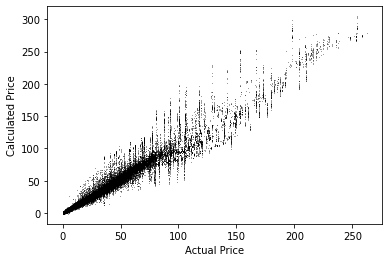

In [43]:
plt.scatter(y_true, y_pred,color='black',linewidth=0.2,alpha=0.5, s=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Calculated Price') 
plt.show()

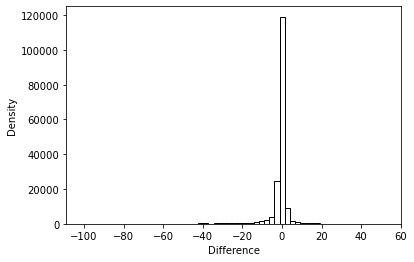

In [44]:
stats = dict()
stats['diff'] = y_true - y_pred
plt.hist(stats['diff'], bins=60,edgecolor='black',color='white')
plt.xlabel('Difference')
plt.ylabel('Density')
plt.show()

In [45]:
y_test_pred=model2.predict(X_test)
test['Put_LSTM']=y_test_pred
test

<ipython-input-45-ec15ff1c370f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Put_LSTM']=y_test_pred


,[UNDERLYING_LAST],[DTE],[STRIKE],[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],Put_BS,Put_LSTM
169263,194.19,1.597370,155.0,9.31,-0.21728,0.00458,0.71246,-0.01784,-0.82469,0.25979,6.751424,10.223564
169264,194.19,1.597370,160.0,10.60,-0.24403,0.00499,0.75959,-0.01922,-0.93018,0.25462,7.759016,11.630687
169265,194.19,1.597370,165.0,11.85,-0.27321,0.00539,0.80422,-0.01951,-1.04431,0.24932,8.862789,13.089265
169266,194.19,1.597370,170.0,14.00,-0.30350,0.00573,0.84444,-0.02100,-1.16709,0.24518,10.166727,14.684264
169267,194.19,1.597370,175.0,15.53,-0.33531,0.00607,0.87844,-0.02109,-1.29530,0.23976,11.495512,16.382809
...,...,...,...,...,...,...,...,...,...,...,...,...
241798,293.20,2.060274,350.0,80.38,-0.69845,0.00415,1.41879,-0.02242,-5.75046,0.19411,59.202701,71.422638
241799,293.20,2.060274,360.0,82.05,-0.74304,0.00396,1.30360,-0.02135,-6.15503,0.18650,65.179230,84.157387
241800,293.20,2.060274,370.0,111.23,-0.78759,0.00361,1.15885,-0.01832,-6.57983,0.17749,71.388575,95.956642
241801,293.20,2.060274,380.0,97.00,-0.83230,0.00330,0.98488,-0.01639,-7.00828,0.16808,78.021552,105.336151


In [46]:
y_true=test[' [P_LAST]']
y_pred=test['Put_LSTM']
print('MAE = ', mean_absolute_error(y_true, y_pred))
print('MSE = ', mean_squared_error(y_true, y_pred))
print('RMSE = ', mean_squared_error(y_true, y_pred, squared=False))

MAE =  1.4000860556321222
MSE =  7.695703177834222
RMSE =  2.774113043449063


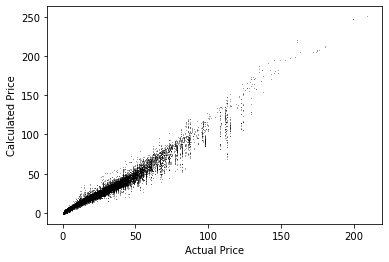

In [47]:
plt.scatter(y_true, y_pred,color='black',linewidth=0.2,alpha=0.5, s=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Calculated Price') 
plt.show()

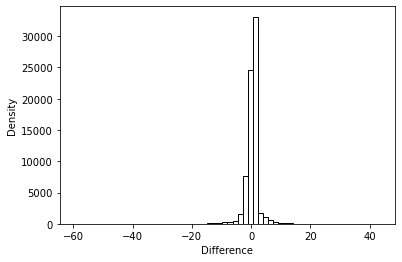

In [48]:
stats = dict()
stats['diff'] = y_true - y_pred
plt.hist(stats['diff'], bins=60,edgecolor='black',color='white')
plt.xlabel('Difference')
plt.ylabel('Density')
plt.show()

In [52]:
# train.to_csv('LSTM PUT train FINAL Results.csv', mode='a', index=False, header=True)

In [53]:
# test.to_csv('LSTM PUT test FINAL Results.csv', mode='a', index=False, header=True)

In [54]:
# model2.save('LSTM_Put.h5')